<a href="https://colab.research.google.com/github/Diegotgagliardi/AppMovelEx4/blob/main/Projeto%20final%20NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files


uploaded = files.upload()

Saving Lista NPS Positivo_V4.xlsx to Lista NPS Positivo_V4 (1).xlsx


In [20]:
import pandas as pd
import pandas as pd
import io

df = pd.read_excel(io.BytesIO(uploaded['Lista NPS Positivo_V4 (1).xlsx']))
print(df)


                          db-id control_id                 invite_id  \
0      620a60fc8e6c63645ad9ca1f     HNFX8D  620a608ab0d07664995bd771   
1      620a6118a152566455632067     DN40ZZ  620a6088b0d07664995b80e0   
2      620a61668e6c63645ad9cb7d     JQMNS6  620a6089b0d07664995bb9b8   
3      620a616f6c698d64297cf7cd     XWHPG9  620a608bb0d07664995c01d3   
4      620a62c66c698d64297d0446     SJV5N6  620a6089b0d07664995bbd1c   
...                         ...        ...                       ...   
25169  670d67e4170506002b5f528a   UFI5NXCB  66e4796c72dcc40013560022   
25170  670e4fa32cf2670022d29370   Q9ANSIQV  6706d700617aa800132c7afe   
25171  670e538cbf0bf200322cd2a5   7TYAZ0Z9  66e47989d7619e001347eb12   
25172  670e59a12cf2670022d2f177   08H0IJKI  66e4796d72dcc400135604c6   
25173  670e5b73867234003aa51c88   TGQLWEDJ  6706d700617aa800132c843e   

      Tipo Produto Grupo de Produto Familia do Produto Modelo do Produto  \
0           Tipo 1          Grupo 1          Familia 1     

>>>>> QUESTÃO 1

**1-	Utilizando a base inteira, calcule o target principal, formando uma nova coluna na base, onde a variável nota será analisada em cada linha:
a.	Notas 9 ou 10 : a coluna target irá conter a classe “promotor”. No total a coluna deve conter 18.251 promotores, sendo essa a classe majoritária.
b.	Notas 8 ou 7: a coluna target irá conter a classe “neutro”. No total a coluna deve conter 4.738 neutros.
c.	Notas < 7: a coluna target irá conter a classe “detrator”. No total a coluna deve conter 2.185 detratores, sendo essa a classe minoritária.
d.	Executar o comando df.groupby(“target”).count() e verificar se as contagens do target batem com a descrição dos itens a, b e c.**

In [21]:

import pandas as pd
#Função para calcular o target, separando o que é promotor, neutro e detrator
def calcular_target(nota):
  if nota in (9, 10):
    return "promotor"
  elif nota in (7, 8):
    return "neutro"
  elif nota < 7:
    return "detrator"
  else:
    return None  # Trata casos de notas inválidas, se houver

# Aplicando a função para criar a coluna 'target'
df['target'] = df['nota'].apply(calcular_target)

In [22]:
contagem_Classes = df.groupby('target').count()
print(contagem_Classes)

          db-id  control_id  invite_id  Tipo Produto  Grupo de Produto  \
target                                                                   
detrator   2185        2185       2185          2185              2185   
neutro     4738        4738       4738          4738              4738   
promotor  18251       18251      18251         18251             18251   

          Familia do Produto  Modelo do Produto  Chassi do Produto  \
target                                                               
detrator                2185               2185               2185   
neutro                  4738               4738               4738   
promotor               18251              18251              18251   

          Marca do Produto   nome  ...  \
target                             ...   
detrator              2185   2185  ...   
neutro                4738   4738  ...   
promotor             18251  18251  ...   

          ¿cómo evalúa la comodidad y la ergonomía de su <modelo> (

In [23]:
df.groupby("target").count()

,db-id,control_id,invite_id,Tipo Produto,Grupo de Produto,Familia do Produto,Modelo do Produto,Chassi do Produto,Marca do Produto,nome,...,"¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)",¿ha tenido algún problema con la confiabilidad/calidad en el que necesitaba comunicarse con su distribuidor? (like/dislike),¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike),¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike),¿se ha resuelto el problema? (like/dislike),você pode explicar que tipo de falhas afetaram o sistema elétrico? (like/dislike),"¿hubo alguna falla que afectó el sistema eléctrico (batería, alternador, interruptores, cableado y arranque, conexiones)? (like/dislike)","p3 - como você avalia a qualidade e a confiabilidade do seu <modelo> (considere o acabamento e a aparência da sua máquina, falhas, problemas de confiabilidade ou avarias que você possa ter tido)? (csat)",reacao,tag_de_tratativa
target,,,,,,,,,,,,,,,,,,,,,
detrator,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,...,42,41,22,39,14,4,30,3,1806,1603
neutro,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,146,141,71,141,78,5,135,1,3601,2946
promotor,18251,18251,18251,18251,18251,18251,18251,18251,18251,18251,...,407,386,107,383,180,16,365,5,12845,2385


>>>>> QUESTÃO 2

**2-	Localizar a variável “mercado” e filtrar para reter apenas instâncias que são do brasil, para isso você pode utilizar um comando como:                    
df = df.loc[df[”mercado”] ==”brasil”].**

In [24]:
# Verificar a presença da coluna 'mercado' e filtrar os registros para 'BRASIL'
if 'mercado' in df.columns:
    df_brasil = df[df['mercado'].str.upper() == 'BRASIL']
    total_brasil = len(df_brasil)
else:
    total_brasil = "A coluna 'mercado' não está presente no DataFrame."

total_brasil

23889

>>>>> QUESTÃO 3

**3-	Assim como no item 2, executar um comando de filtragem para trabalhar com o grupo que a sua equipe ficou encarregada. O nome da variável a ser filtrada é “Grupo de Produto”, exemplo : df = df.loc[df[”Grupo de Produto”] == “Grupo x”], onde x é o número de seu grupo.**

In [25]:
# Verificar a presença da coluna 'Grupo de Produto' e filtrar para o Grupo 7
if 'Grupo de Produto' in df_brasil.columns:
    grupo7_df = df_brasil[df_brasil['Grupo de Produto'] == 'Grupo 7']
    total_grupo7 = len(grupo7_df)
else:
    total_grupo7 = "A coluna 'Grupo de Produto' não está presente no DataFrame."

total_grupo7

418

>>>>> QUESTÃO 4

4-	Fazer a volumetria de target, calculando para o seu grupo quantos promotores, neutros e detratores ficaram na base, calcular também o percentual de cada classe.**

In [26]:
# Calcular a volumetria e o percentual dos targets no Grupo 4
volumetria_grupo7 = grupo7_df['target'].value_counts()
percentual_grupo7 = (volumetria_grupo7 / volumetria_grupo7.sum()) * 100

volumetria_grupo7, percentual_grupo7

(target
 promotor    295
 neutro       95
 detrator     28
 Name: count, dtype: int64,
 target
 promotor    70.574163
 neutro      22.727273
 detrator     6.698565
 Name: count, dtype: float64)

>>>>> QUESTÃO 5

**5-	Criar uma coluna chamada região, que irá corresponder as 5 regiões do país, baseado na informação da coluna “estado”. Ex: se o estado for Paraná, Santa Catarina ou Rio grande do Sul, a coluna região deve conter a string “sul”.**

In [27]:
# Mapeamento das regiões brasileiras
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Função para atribuir a região com base no estado
def atribuir_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return None  # Caso o estado não seja encontrado no mapeamento

# Criar a coluna 'região' no DataFrame do Grupo 7
if 'estado' in grupo7_df.columns:
    grupo7_df['região'] = grupo7_df['estado'].apply(atribuir_regiao)
    regioes_distribuicao = grupo7_df['região'].value_counts()
else:
    regioes_distribuicao = "A coluna 'estado' não está presente no DataFrame."

regioes_distribuicao

<ipython-input-27-6b3a4409c0c7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo7_df['região'] = grupo7_df['estado'].apply(atribuir_regiao)


,count
região,
Centro-Oeste,214
Sudeste,69
Sul,39
Norte,34
Nordeste,25


>>>>> QUESTÃO 6

**6-	Criar uma coluna chamada safra, baseada na variável “data_resposta”, capturando apenas o ano da resposta.**

In [28]:
# Converter 'data_resposta' para datetime e criar a coluna 'safra'
if 'data_resposta' in grupo7_df.columns:
    grupo7_df['data_resposta'] = pd.to_datetime(grupo7_df['data_resposta'], errors='coerce')
    grupo7_df['safra'] = grupo7_df['data_resposta'].dt.year
    safra_distribuicao = grupo7_df['safra'].value_counts()
else:
    safra_distribuicao = "A coluna 'data_resposta' não está presente no DataFrame."

safra_distribuicao

<ipython-input-28-5b3f0668f47d>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  grupo7_df['data_resposta'] = pd.to_datetime(grupo7_df['data_resposta'], errors='coerce')
<ipython-input-28-5b3f0668f47d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo7_df['data_resposta'] = pd.to_datetime(grupo7_df['data_resposta'], errors='coerce')
<ipython-input-28-5b3f0668f47d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,count
safra,
2023,279
2022,76
2024,63


>>>>> QUESTÃO 7 PARTE 1

**7-	Calcular a volumetria do target Safrada (pelo ano) para a base total (sempre filtrada para o seu grupo), fazer a mesma volumetria para cada região do país e para cada um dos quatro períodos de pesquisa baseado na coluna “Período de Pesquisa”. A volumetria deve ser calculada em valores absolutos e percentuais. Além do cálculo safrado, a volumetria deve somar todas as safras no final. Fazer verificações se o total é coerente com a contagem obtida diretamente da base.**

In [29]:
# Função para calcular a volumetria por safra
def calcular_volumetria_safra(dataframe, coluna_safra='safra', coluna_target='target'):
    safra_volumetria = dataframe.groupby(coluna_safra)[coluna_target].value_counts().unstack(fill_value=0)
    safra_volumetria['Total'] = safra_volumetria.sum(axis=1)
    safra_volumetria['%Promotores'] = (safra_volumetria.get('promotor', 0) / safra_volumetria['Total']) * 100
    safra_volumetria['%Neutros'] = (safra_volumetria.get('neutro', 0) / safra_volumetria['Total']) * 100
    safra_volumetria['%Detratores'] = (safra_volumetria.get('detrator', 0) / safra_volumetria['Total']) * 100
    safra_volumetria.loc['Total'] = safra_volumetria.sum()  # Somar todas as safras
    safra_volumetria.loc['Total', '%Promotores'] = (safra_volumetria.loc['Total', 'promotor'] / safra_volumetria.loc['Total', 'Total']) * 100
    safra_volumetria.loc['Total', '%Neutros'] = (safra_volumetria.loc['Total', 'neutro'] / safra_volumetria.loc['Total', 'Total']) * 100
    safra_volumetria.loc['Total', '%Detratores'] = (safra_volumetria.loc['Total', 'detrator'] / safra_volumetria.loc['Total', 'Total']) * 100
    return safra_volumetria

# Calcular a volumetria para a base total por safra
volumetria_total_safra = calcular_volumetria_safra(grupo7_df)

# Exibir a tabela de volumetria diretamente no ambiente Google Colab
volumetria_total_safra

target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores
safra,,,,,,,
2022,8.0,22.0,46.0,76.0,60.526316,28.947368,10.526316
2023,14.0,67.0,198.0,279.0,70.967742,24.014337,5.017921
2024,6.0,6.0,51.0,63.0,80.952381,9.523810,9.523810
Total,28.0,95.0,295.0,418.0,70.574163,22.727273,6.698565


>>>>> QUESTÃO 7 PARTE 2

**7 Após o cálculo das volumetrias, inferir se existe diferença de balanceamento entre as classes, fazer isso para as safras e para o total, indicando no relatório a classe majoritária e a classe minoritária. Também indicar no relatório se alguma safra apresenta uma volumetria muito diferente comparada com as demais safras. Repetir essa análise fazendo novas tabelas de volumetria para cada filtragem do seu grupo, sendo que no total deve ter: (i) uma tabela de volumetria para Base total, (ii) 5 tabelas de volumetrias para as regiões e (iv) 4 tabelas de volumetrias para os períodos de pesquisas. No total, o relatório deverá conter 10 tabelas de volumetria igual a este exemplo com suas respectivas análises.**

In [30]:
# Ajustar a função para lidar com categorias ausentes
def calcular_volumetria_safra_ajustada(dataframe, coluna_safra='safra', coluna_target='target'):
    safra_volumetria = dataframe.groupby(coluna_safra)[coluna_target].value_counts().unstack(fill_value=0)
    # Garantir que todas as categorias estão presentes
    for categoria in ['promotor', 'neutro', 'detrator']:
        if categoria not in safra_volumetria.columns:
            safra_volumetria[categoria] = 0

    safra_volumetria['Total'] = safra_volumetria.sum(axis=1)
    safra_volumetria['%Promotores'] = (safra_volumetria['promotor'] / safra_volumetria['Total']) * 100
    safra_volumetria['%Neutros'] = (safra_volumetria['neutro'] / safra_volumetria['Total']) * 100
    safra_volumetria['%Detratores'] = (safra_volumetria['detrator'] / safra_volumetria['Total']) * 100

    safra_volumetria.loc['Total'] = safra_volumetria.sum()
    safra_volumetria.loc['Total', '%Promotores'] = (safra_volumetria.loc['Total', 'promotor'] / safra_volumetria.loc['Total', 'Total']) * 100
    safra_volumetria.loc['Total', '%Neutros'] = (safra_volumetria.loc['Total', 'neutro'] / safra_volumetria.loc['Total', 'Total']) * 100
    safra_volumetria.loc['Total', '%Detratores'] = (safra_volumetria.loc['Total', 'detrator'] / safra_volumetria.loc['Total', 'Total']) * 100
    return safra_volumetria

# Recalcular volumetria por região com ajuste
def recalcular_volumetria_por_regiao(dataframe, coluna_regiao='região', coluna_safra='safra', coluna_target='target'):
    regioes = dataframe[coluna_regiao].unique()
    regioes_volumetria = {}
    for regiao in regioes:
        if pd.notna(regiao):  # Ignorar valores nulos
            df_regiao = dataframe[dataframe[coluna_regiao] == regiao]
            regioes_volumetria[regiao] = calcular_volumetria_safra_ajustada(df_regiao, coluna_safra, coluna_target)
    return regioes_volumetria

# Recalcular
volumetria_por_regiao_corrigida = recalcular_volumetria_por_regiao(grupo7_df)

# Exibir as tabelas de volumetria por região diretamente no console
for regiao, tabela in volumetria_por_regiao_corrigida.items():
    print(f"\nVolumetria Ajustada para a Região {regiao}:\n")
    print(tabela)



Volumetria Ajustada para a Região Nordeste:

target  detrator  neutro  promotor  Total  %Promotores  %Neutros  %Detratores
safra                                                                        
2022         0.0     1.0       1.0    2.0        50.00      50.0         0.00
2023         1.0     2.0      13.0   16.0        81.25      12.5         6.25
2024         0.0     0.0       7.0    7.0       100.00       0.0         0.00
Total        1.0     3.0      21.0   25.0        84.00      12.0         4.00

Volumetria Ajustada para a Região Centro-Oeste:

target  detrator  neutro  promotor  Total  %Promotores   %Neutros  %Detratores
safra                                                                         
2022         3.0    11.0      24.0   38.0    63.157895  28.947368     7.894737
2023        10.0    31.0     110.0  151.0    72.847682  20.529801     6.622517
2024         3.0     3.0      19.0   25.0    76.000000  12.000000    12.000000
Total       16.0    45.0     153.0  214.0

>>>>> QUESTÃO 8

**8-	Filtrar as perguntas pertencentes ao seu grupo. Descartar quaisquer colunas que não sejam necessárias para a continuidade da análise.**

AINDA NÃO FIZ

>>>>> QUESTÃO 9

**9-	Em um primeiro momento fazer para o seu grupo a correlação de spearman, entre a variável nota e as demais variáveis de perguntas (contendo a nota de 0 a 10). Ordenar a lista de correlações da maior correlação para a menor, grifando em vermelho as correlações fortes, grifando em azul as correlações médias e grifando em verde as correlações fracas. Fazer isso para o seu grupo inteiro, por região e por período de pesquisa. Apresentar também a lista de correlações Safrada, uma lista por safra, replicando o trabalho para cada região e período de pesquisa.**

In [31]:
# Filtrar o Grupo 7
grupo7_df = df[df['Grupo de Produto'] == 'Grupo 7']

# Selecionar colunas relevantes para análise de correlação
colunas_escaladas = [col for col in grupo7_df.columns if grupo7_df[col].dtype in ['float64', 'int64'] and col != 'nota']

# Preparar DataFrame para correlação
grupo7_corr_df = grupo7_df[['nota'] + colunas_escaladas]

# Calcular a correlação de Spearman
spearman_corr = grupo7_corr_df.corr(method='spearman')

# Ordenar as correlações da maior para a menor em relação à 'nota'
spearman_corr_sorted = spearman_corr['nota'].drop('nota').sort_values(ascending=False)

# Destacar as correlações com cores conforme os critérios
def destacar_correlacao(valor):
    if abs(valor) >= 0.7:
        return f"🔴 {valor:.3f}"  # Vermelho (forte)
    elif 0.4 <= abs(valor) < 0.7:
        return f"🔵 {valor:.3f}"  # Azul (média)
    else:
        return f"🟢 {valor:.3f}"  # Verde (fraca)

# Aplicar destaque
spearman_corr_destacada = spearman_corr_sorted.apply(destacar_correlacao)

# Exibir as correlações destacadas
spearman_corr_destacada


,nota
capacidad operativa (hectáreas por hora) (csat),🔴 1.000
consumo de combustível (litros por hectares) (csat),🔴 1.000
adequação as diversas operações e implementos (csat),🔴 0.833
"agora, considere características específicas do seu <modelo>, como você avalia seu desempenho (csat)",🔴 0.814
"como você avalia o conforto e a ergonomia do seu <modelo> (considere, por exemplo, o conforto do assento, a visibilidade da cabine, a compreensão e o layout dos controles)? (csat)",🔴 0.759
...,...
"nesse período você teve algum problema de materiais, vazamentos, acabamento ou montagem? (csat)",🟢 nan
¿está satisfecho con la calidad del producto? (csat),🟢 nan
ahora considere las características específicas de su <modelo> mientras evalúa su desempeño. (csat),🟢 nan
"¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)",🟢 nan


**TESTE DO MODELO PARA VER PELA CURVA SE O MODELO ESTA BOM OU RUIM**

In [32]:
# Recriar as colunas necessárias para os targets binários
grupo7_df['target'] = grupo7_df['nota'].apply(calcular_target)

# Criar os targets binários novamente
grupo7_df['target_detrator'] = (grupo7_df['target'] == 'detrator').astype(int)
grupo7_df['target_neutro'] = (grupo7_df['target'] == 'neutro').astype(int)

# Confirmar a criação das colunas
grupo7_df[['target', 'target_detrator', 'target_neutro']].head()


<ipython-input-32-c9a6693f826c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo7_df['target'] = grupo7_df['nota'].apply(calcular_target)
<ipython-input-32-c9a6693f826c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo7_df['target_detrator'] = (grupo7_df['target'] == 'detrator').astype(int)
<ipython-input-32-c9a6693f826c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,target,target_detrator,target_neutro
198,promotor,0,0
212,neutro,0,1
222,promotor,0,0
224,promotor,0,0
226,detrator,1,0


In [33]:
# Repetir o processo de treinamento com os dados corrigidos
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Assuming 'colunas_escaladas' from your previous code contains the features
X_cleaned = grupo7_df[colunas_escaladas]  # Define X_cleaned using your feature columns

# Dados para o modelo de Detratores
y_detrator = grupo7_df['target_detrator']
X_train_detrator, X_test_detrator, y_train_detrator, y_test_detrator = train_test_split(X_cleaned, y_detrator, test_size=0.2, random_state=42)

# Dados para o modelo de Neutros
y_neutro = grupo7_df['target_neutro']
X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X_cleaned, y_neutro, test_size=0.2, random_state=42)

# Treinar os modelos
rf_detrator = RandomForestClassifier(random_state=42)
rf_detrator.fit(X_train_detrator, y_train_detrator)

rf_neutro = RandomForestClassifier(random_state=42)
rf_neutro.fit(X_train_neutro, y_train_neutro)

# Fazer previsões
y_pred_detrator = rf_detrator.predict(X_test_detrator)
y_pred_neutro = rf_neutro.predict(X_test_neutro)

# Avaliar os modelos
report_detrator = classification_report(y_test_detrator, y_pred_detrator, output_dict=True)
report_neutro = classification_report(y_test_neutro, y_pred_neutro, output_dict=True)

# AUC-ROC para ambos
roc_auc_detrator = roc_auc_score(y_test_detrator, rf_detrator.predict_proba(X_test_detrator)[:, 1])
roc_auc_neutro = roc_auc_score(y_test_neutro, rf_neutro.predict_proba(X_test_neutro)[:, 1])

# Consolidar resultados
results_final_cleaned_models = {
    "Modelo Detrator": {
        "AUC-ROC": roc_auc_detrator,
        "Relatório de Classificação": report_detrator,
    },
    "Modelo Neutro": {
        "AUC-ROC": roc_auc_neutro,
        "Relatório de Classificação": report_neutro,
    },
}

results_final_cleaned_models


{'Modelo Detrator': {'AUC-ROC': 0.9850427350427351,
  'Relatório de Classificação': {'0': {'precision': 0.9629629629629629,
    'recall': 1.0,
    'f1-score': 0.9811320754716981,
    'support': 78.0},
   '1': {'precision': 1.0,
    'recall': 0.5,
    'f1-score': 0.6666666666666666,
    'support': 6.0},
   'accuracy': 0.9642857142857143,
   'macro avg': {'precision': 0.9814814814814814,
    'recall': 0.75,
    'f1-score': 0.8238993710691824,
    'support': 84.0},
   'weighted avg': {'precision': 0.9656084656084655,
    'recall': 0.9642857142857143,
    'f1-score': 0.958670260557053,
    'support': 84.0}}},
 'Modelo Neutro': {'AUC-ROC': 0.8301020408163264,
  'Relatório de Classificação': {'0': {'precision': 0.9264705882352942,
    'recall': 0.9,
    'f1-score': 0.9130434782608695,
    'support': 70.0},
   '1': {'precision': 0.5625,
    'recall': 0.6428571428571429,
    'f1-score': 0.6,
    'support': 14.0},
   'accuracy': 0.8571428571428571,
   'macro avg': {'precision': 0.74448529411764

>>>>> QUESTÃO 10

**10-	Faça 2 modelos de classificação binária por análise (um para neutro e outro para detrator). Para isso, use apenas as variáveis numéricas (perguntas) como variáveis de entrada (X) e treine o modelo com um novo target, reduzindo o target de 3 classes para 2 classes, transformando o problema multi-classe e um problema de classificação binária (exemplo 1: modelo de detratores, positivar caso detrator e negativar caso neutro ou promotor) (y) (exemplo 2: modelo de neutros, positivar caso neutro e negativar caso detrator ou promotor) (y). Importante!! Ao criar o target binário, não utilize no espaço de características do modelo (X) o target de 3 classes como entrada, nem a variável nota, pois ambas são consideradas vazamento neste contexto (pois derivam o target). Sendo assim, para cada modelo, o X (espaço de características) deve conter todas as colunas de perguntas, menos a variável nota e o y (target) deve conter apenas o target binário adaptado.**

In [39]:
# Filtrando apenas as colunas numéricas relacionadas às perguntas
# Changed the column names to drop to the actual column names in the dataframe
X = grupo7_df.drop(columns=["nota", "target", "target_detrator", "target_neutro", "mercado", "Grupo de Produto"])
X = X.select_dtypes(include=['float64', 'int64'])

# Modelos Binários
# 1. Modelo para Detratores
# Criando o target binário para detratores
# Changed df_grupo to grupo7_df
y_detrator = grupo7_df["target"].apply(lambda x: 1 if x == "detrator" else 0)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_detrator, test_size=0.3, random_state=42)

# Treinando o modelo RandomForest
rf_detrator = RandomForestClassifier(random_state=42, n_estimators=100)
rf_detrator.fit(X_train, y_train)

# Predições e avaliação
y_pred_detrator = rf_detrator.predict(X_test)
print("Modelo Detrator:")
print(classification_report(y_test, y_pred_detrator))
print("Acurácia:", accuracy_score(y_test, y_pred_detrator))

# 2. Modelo para Neutros
# Criando o target binário para neutros
# Changed df_grupo to grupo7_df
y_neutro = grupo7_df["target"].apply(lambda x: 1 if x == "neutro" else 0)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

# Treinando o modelo RandomForest
rf_neutro = RandomForestClassifier(random_state=42, n_estimators=100)
rf_neutro.fit(X_train, y_train)

# Predições e avaliação
y_pred_neutro = rf_neutro.predict(X_test)
print("Modelo Neutro:")
print(classification_report(y_test, y_pred_neutro))
print("Acurácia:", accuracy_score(y_test, y_pred_neutro))

# Extraindo as Top 10 variáveis para cada modelo
# Variáveis mais importantes para o modelo Detrator
importances_detrator = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_detrator.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_detrator = importances_detrator.head(10)
print("Top 10 Variáveis - Modelo Detrator:")
print(top_10_detrator)

# Variáveis mais importantes para o modelo Neutro
importances_neutro = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_neutro.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_neutro = importances_neutro.head(10)
print("Top 10 Variáveis - Modelo Neutro:")
print(top_10_neutro)

Modelo Detrator:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       115
           1       1.00      0.55      0.71        11

    accuracy                           0.96       126
   macro avg       0.98      0.77      0.84       126
weighted avg       0.96      0.96      0.95       126

Acurácia: 0.9603174603174603
Modelo Neutro:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       102
           1       0.60      0.50      0.55        24

    accuracy                           0.84       126
   macro avg       0.74      0.71      0.72       126
weighted avg       0.83      0.84      0.84       126

Acurácia: 0.8412698412698413
Top 10 Variáveis - Modelo Detrator:
                                              Feature  Importance
8   adaptabilidade as mais diversas condições de t...    0.131853
90  agora, considere características específicas d...    0.107930
17  adaptabilidade as 

<ipython-input-40-568ecf1a1a3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_10_detrator, palette="viridis")
<ipython-input-40-568ecf1a1a3a>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


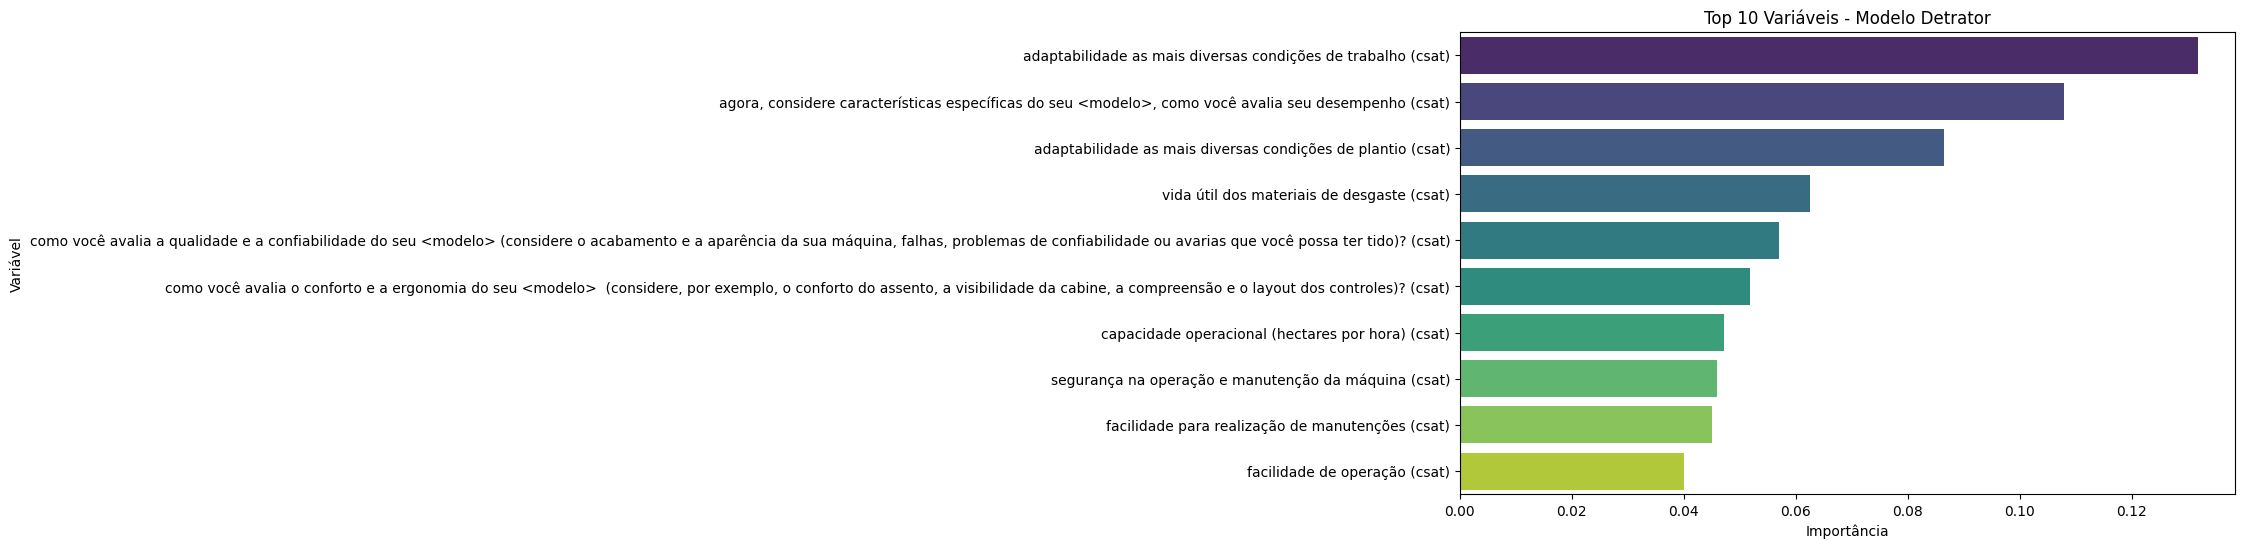

<ipython-input-40-568ecf1a1a3a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_10_neutro, palette="viridis")


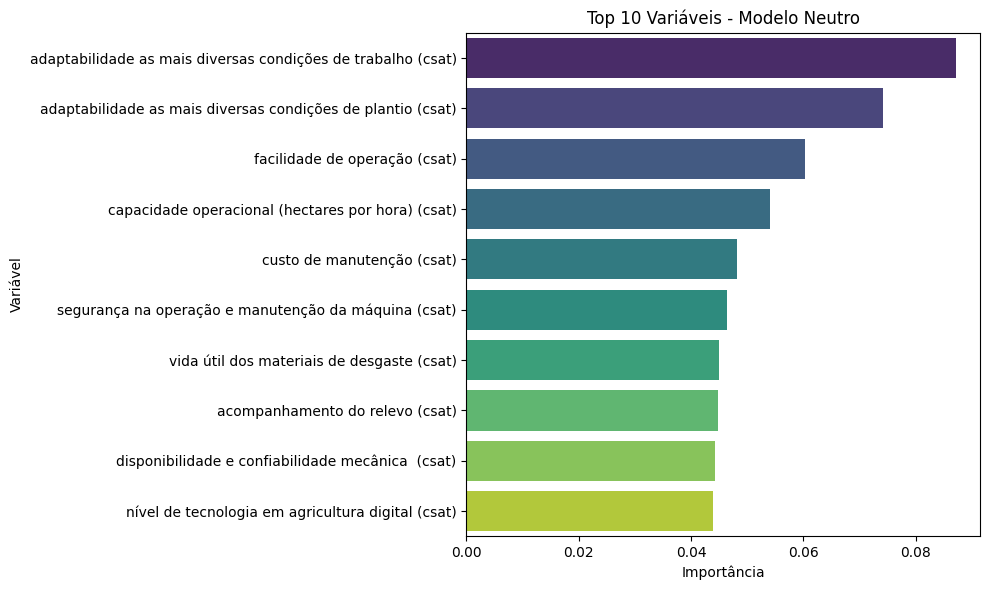

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para as variáveis mais importantes do modelo detrator
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_10_detrator, palette="viridis")
plt.title("Top 10 Variáveis - Modelo Detrator")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# Gráfico para as variáveis mais importantes do modelo neutro
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_10_neutro, palette="viridis")
plt.title("Top 10 Variáveis - Modelo Neutro")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


In [41]:
import plotly.express as px
import pandas as pd

# Preparando os dados para o gráfico (importância das variáveis do modelo detrator)
top_10_detrator['Model'] = 'Detrator'  # Adiciona uma coluna para diferenciar o modelo
top_10_neutro['Model'] = 'Neutro'

# Combina as importâncias de ambos os modelos
top_features = pd.concat([top_10_detrator, top_10_neutro])

# Gráfico interativo
fig = px.bar(
    top_features,
    x="Importance",
    y="Feature",
    color="Model",
    facet_col="Model",
    title="Top 10 Variáveis por Modelo",
    orientation='h',
    height=600
)
fig.update_layout(showlegend=True)
fig.show()


<ipython-input-41-e097457faaf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_detrator['Model'] = 'Detrator'  # Adiciona uma coluna para diferenciar o modelo
<ipython-input-41-e097457faaf3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_neutro['Model'] = 'Neutro'


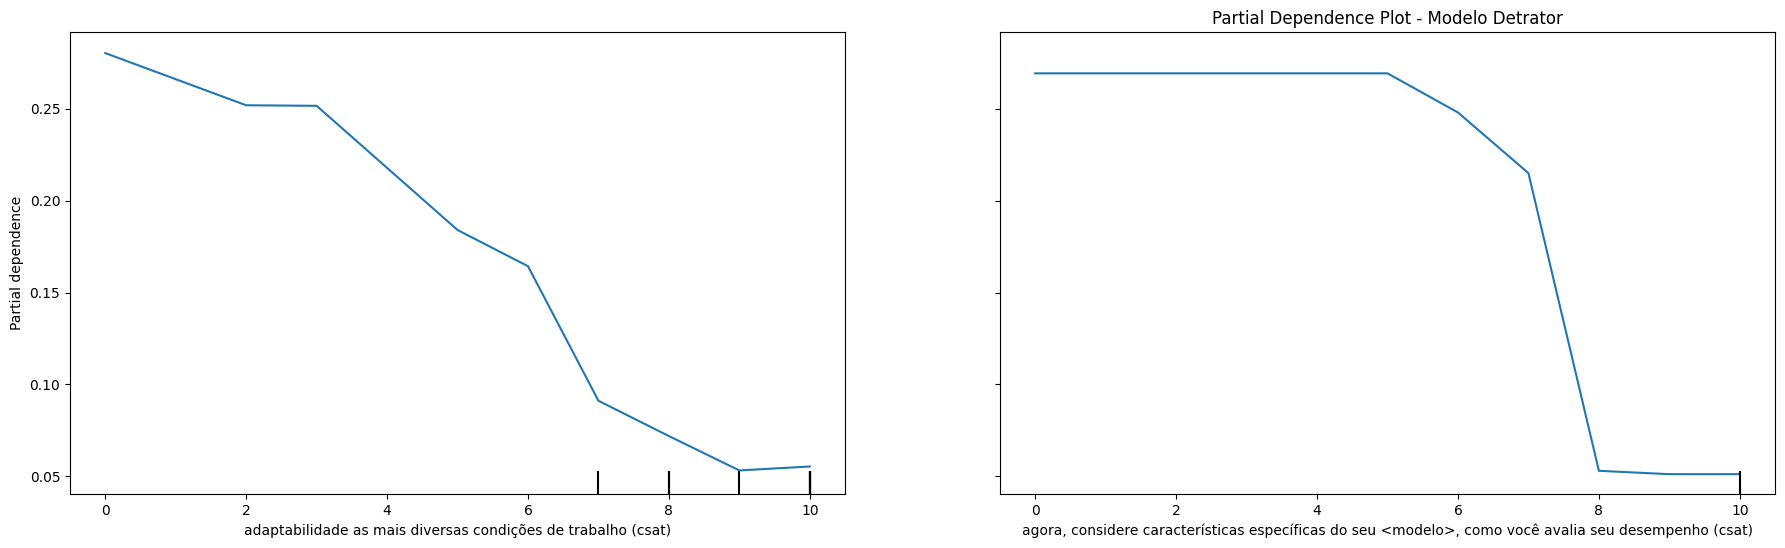

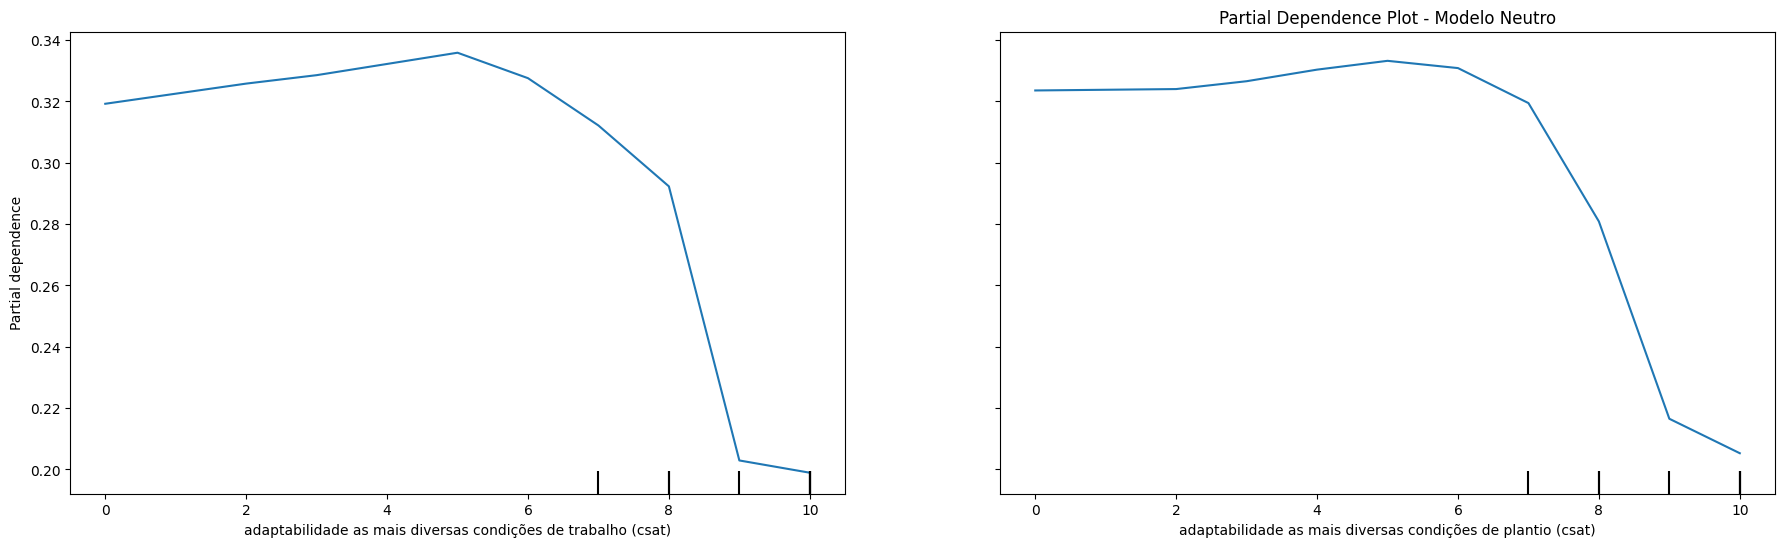

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Escolha as variáveis para o PDP (as mais importantes)
top_variables_detrator = top_10_detrator['Feature'].iloc[:2]  # Top 2 variáveis do modelo detrator
top_variables_neutro = top_10_neutro['Feature'].iloc[:2]     # Top 2 variáveis do modelo neutro

# PDP para o modelo detrator
fig, ax = plt.subplots(figsize=(22, 6))
PartialDependenceDisplay.from_estimator(
    rf_detrator,
    X,
    features=top_variables_detrator,
    feature_names=X.columns,
    ax=ax
)
plt.title("Partial Dependence Plot - Modelo Detrator")
plt.show()

# PDP para o modelo neutro
fig, ax = plt.subplots(figsize=(22, 6))
PartialDependenceDisplay.from_estimator(
    rf_neutro,
    X,
    features=top_variables_neutro,
    feature_names=X.columns,
    ax=ax
)

plt.title("Partial Dependence Plot - Modelo Neutro")
plt.show()


>>>>> QUESTÃO 11

**11-	No total devem ser feitos 20 modelos: um modelo detrator e um modelo neutro para a base inteira filtrada pelo seu grupo, repetindo a análise por: região e período de pesquisa. Não precisa fazer modelos safrados!**

>>>>> QUESTÃO 12

**12-	Colocar no relatório as top 10 variáveis de cada modelo, para isso use um modelo como RandomForest ou XGbooost. Tirar as conclusões sobre top variáveis, podendo comparar esta análise com a lista de correlações.**

>>>>> QUESTÃO 13

**13-	Tentar avaliar as 5 top-variáveis de cada modelo com uma das técnica de gráfico, podendo ser PDP, ALE ou SHAP.  A explicação de como fazer estes gráficos será fornecida nas próximas aulas, antes da avaliação.**

PESOAL A BASE ESTÁ AI, SÓ LEMBRANDO QUE EM TODAS AS BASES PRATICAMENTE VAI TER DE FAZER UMA BASE POR SAFRA E REGIÃO